In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data into the pandas environment and identify some basic details of the dataset.


In [2]:
df = pd.read_csv('employee.csv')

In [3]:
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [4]:
df.shape

(9, 7)

In [5]:
df.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [7]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [8]:
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

### Reset the index as "name" as the index.

In [9]:
 df.set_index('name',inplace = True)


### Select rows for specific names Jack Morgan and Josh wills.

In [10]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### Select data for multiple values "Sales" and “Finance”.

In [11]:
department_group = df.groupby('department')

In [12]:
department_group.get_group('Sales')

,age,income,gender,department,grade,performance_score
name,,,,,,
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [13]:
department_group.get_group('Finance')

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### Display employee who has more than 700 performance score.

In [14]:
df[df.performance_score>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### Display employee who has more than 500 and less than 700 performance score

In [15]:
df[(df.performance_score>500) & (df.performance_score<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


###  Check and handle missing values in the dataset.

In [16]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'performance_score'}>,
        <AxesSubplot:>]], dtype=object)

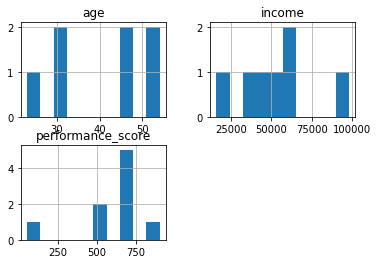

In [17]:
df.hist()

In [18]:
for item in ['age','income']:
    df[item] = df[item].fillna(df[item].median())

In [19]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])


In [20]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

### Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:ylabel='age'>

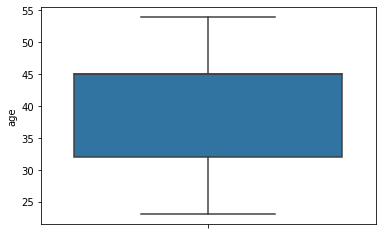

In [21]:
# First lets check the age column for any outliers
sns.boxplot(y = df.age)

There are no outliers present in the age column

<AxesSubplot:ylabel='income'>

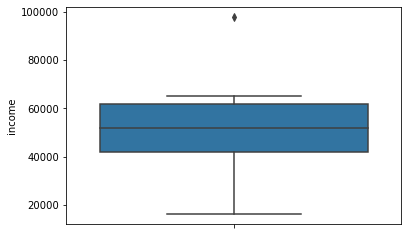

In [22]:
#Outliers in Column income
sns.boxplot(y = df.income)

As we can see there is an outlier in this column so we have to remove it

In [23]:
q1 = np.percentile(df['income'],25,interpolation = 'midpoint')
q2 = np.percentile(df['income'],50,interpolation = 'midpoint')
q3 = np.percentile(df['income'],75,interpolation = 'midpoint')

In [24]:
IQR = q3-q1
print(q1,q2,q3)

42000.0 52000.0 62000.0


In [25]:
low_limit = q1 -1.5*IQR
up_limit = q3 + 1.5*IQR

In [26]:
outliers = []
for i in df.income:
    if(i>up_limit or i<low_limit):
        outliers.append(i)
outliers

[98000.0]

In [27]:
outlier = df['income']>up_limit
df.loc[outlier].index

Index(['Leo Duck'], dtype='object', name='name')

In [28]:
df.drop('Leo Duck',inplace=True)

<AxesSubplot:ylabel='income'>

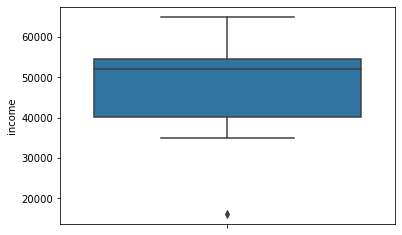

In [29]:
sns.boxplot(y = df.income)

<AxesSubplot:ylabel='performance_score'>

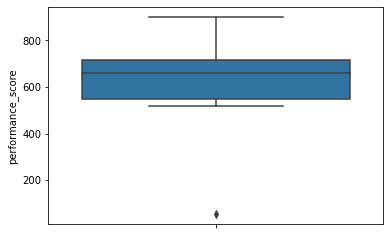

In [30]:
# Now lets check the performance score column for any outliers
sns.boxplot(y = df.performance_score)

Here also there is an outlier so we have to remove it

In [31]:
q1_per = np.percentile(df['performance_score'],25,interpolation = 'midpoint')
q2_per = np.percentile(df['performance_score'],50,interpolation = 'midpoint')
q3_per = np.percentile(df['performance_score'],75,interpolation = 'midpoint')

In [32]:
IQR_per = q3_per-q1_per
print(q1_per,q2_per,q3_per)

538.0 661.5 717.0


In [33]:
low_limit_per = q1_per - 1.5 * IQR_per
up_limit_per = q3_per + 1.5 * IQR_per
up_limit_per

985.5

In [34]:
outlier_per = df['performance_score']<low_limit_per
df.loc[outlier_per].index

Index(['James Authur'], dtype='object', name='name')

In [35]:
df.drop('James Authur',inplace=True)

<AxesSubplot:ylabel='performance_score'>

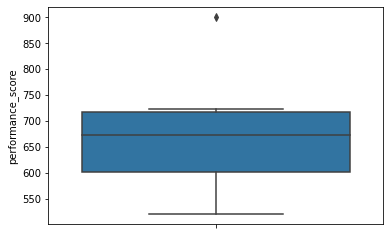

In [36]:
sns.boxplot(y = df.performance_score)

Here we can see that the outlier lies above a value of 850. We can perform the previous steps or just filter out values above 850 in this case

In [37]:
outlier_per = df['performance_score']>850
df.loc[outlier_per].index

Index(['Josh Wills'], dtype='object', name='name')

In [38]:
df.drop('Josh Wills',inplace=True)

<AxesSubplot:ylabel='performance_score'>

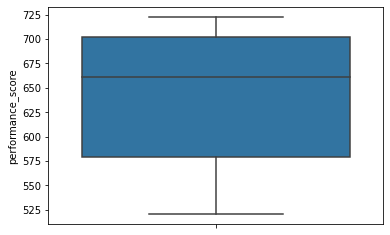

In [39]:
sns.boxplot(y = df.performance_score)

### Check the gender column and do Dummy encoding.

In [40]:
df_new = pd.get_dummies(df,columns=['gender'])

In [41]:
df_new

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0


### Do the standard scaling on the feature performance score

In [42]:
from sklearn import preprocessing

In [43]:
standardization = preprocessing.StandardScaler()
X = standardization.fit_transform(df.select_dtypes('int64'))

In [44]:
X = pd.DataFrame(X)
X

,0
0,1.108114
1,-1.564526
2,0.462994
3,-1.090560
4,0.950126
5,0.133851
